<a href="https://colab.research.google.com/github/anisfreelancer71/kapal_titanic/blob/main/Predictif_modeling_california_housing_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library
Import pustaka yang diperlukan seperti yang telah disebutkan sebelumnya.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


##Muat Data
Muat data dari file CSV "california_housing_train.csv" ke dalam DataFrame pandas.

In [2]:
data = pd.read_csv("california_housing_train.csv")


##Eksplorasi Data
Lakukan eksplorasi data untuk memahami karakteristiknya seperti tipe data, statistik deskriptif, dan visualisasi jika diperlukan.

In [3]:
print(data.head())
print(data.describe())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.62

##Persiapan Data
Persiapkan data untuk pelatihan model. Ini termasuk pemilihan fitur, pembagian data menjadi data pelatihan dan pengujian, dan penskalaan data jika diperlukan.

In [4]:
# Pilih fitur dan target
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Pembuatan Model
Buat model prediksi, misalnya model regresi linear.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

##Evaluasi Model
Evaluasi kinerja model dengan menghitung metrik seperti Mean Squared Error (MSE) dan R-squared (R2).

In [6]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MSE: 4634658406.223357
R-squared: 0.6636396350243802


##Visualisasi Hasil (Opsional)
Jika diperlukan, Anda dapat membuat visualisasi hasil prediksi, seperti grafik scatter plot antara nilai yang diprediksi dan nilai sebenarnya.

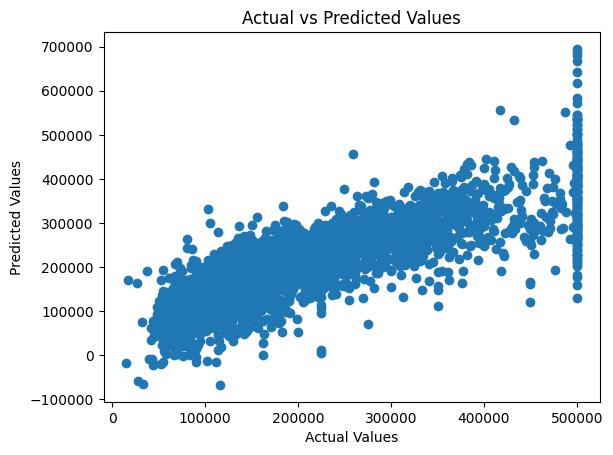

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
